In [1]:
!pip install tensorflow
!pip install keras --upgrade

In [2]:
#!pip install keras

In [3]:
#!pip install keras --upgrade

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
image_size = 256
batch_size = 32
channels = 3
epochs = 20

In [36]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"C:\\Users\\Acer\\Downloads\\corn worm\\WormData_Classifier\\WormData",
shuffle = True,
image_size = (image_size, image_size),
)

Found 240 files belonging to 2 classes.


In [37]:
class_name = dataset.class_names
class_name

['corn_earworm', 'fall_armyworm']

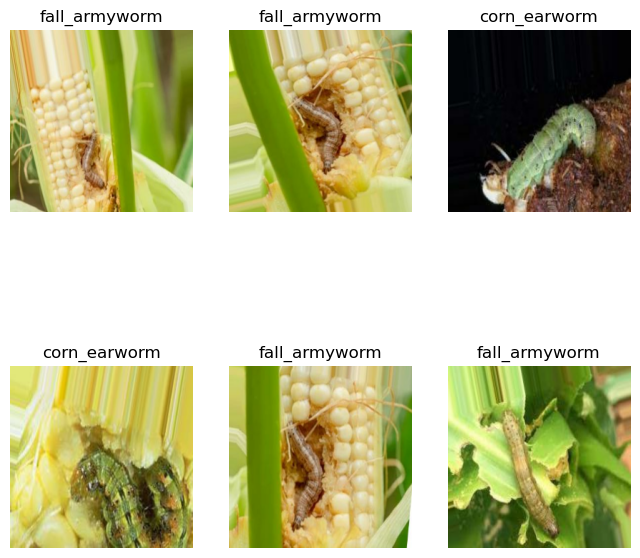

In [38]:
plt.figure(figsize = (8,8))
for image_batch, label_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [39]:
print(len(dataset))

8


In [40]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
# Spli dataset into train, test and validation
def get_dataset_partitions_tf(ds, train_split = 0.7, test_split = 0.3, shuffle = True, shuffle_size = 10 ):
    ds_size = len(ds) #8
    train_size = int(train_split* ds_size)
    train_ds = ds.take(train_size)
    
    test_size = int(test_split * ds_size)
    test_ds = ds.skip(train_size).take(test_size)
    return train_ds, test_ds

In [42]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds))
print(len(test_ds))

5
2


In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [44]:
#Data scaling, resizing
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size, image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [45]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 2
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax")
    
])

model.build(input_shape = input_shape)

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [48]:
history = model.fit(train_ds,
                   epochs = epochs,
                   batch_size = batch_size,
                   verbose = 1,
                   validation_data = test_ds)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4070 - loss: 0.7053 - val_accuracy: 0.5938 - val_loss: 0.6926
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5099 - loss: 0.6939 - val_accuracy: 0.6250 - val_loss: 0.6906
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5458 - loss: 0.6919 - val_accuracy: 0.6094 - val_loss: 0.6846
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5325 - loss: 0.6913 - val_accuracy: 0.6250 - val_loss: 0.6806
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5107 - loss: 0.6892 - val_accuracy: 0.6875 - val_loss: 0.6717
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6023 - loss: 0.6837 - val_accuracy: 0.4062 - val_loss: 0.7177
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5893 - loss: 0.6631 - val_accuracy: 0.6250 - val_loss: 0.6318
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5871 - loss: 0.6538 - val_accuracy: 0.4219 - val_loss: 0.6911
Epoch 9/20
5/

In [49]:
# model evaluation on test datset
score = model.evaluate(test_ds) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.9375 - loss: 0.2722


In [50]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

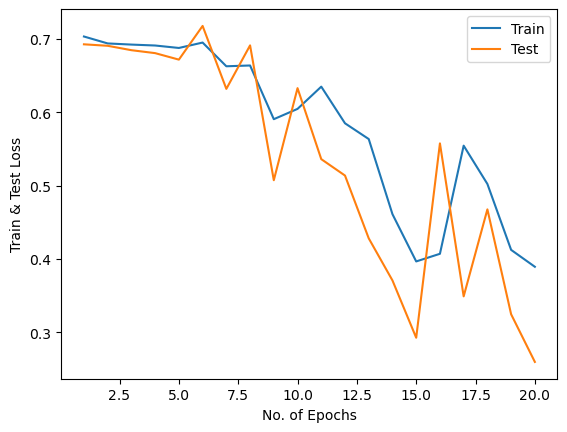

In [51]:
# list of epoch number 
x = list(range(1,epochs+1)) 
plt.xlabel("No. of Epochs")
plt.ylabel("Train & Test Loss")
plt.plot(x, loss)
plt.plot(x, val_loss)
plt.legend(["Train","Test"])
plt.show()

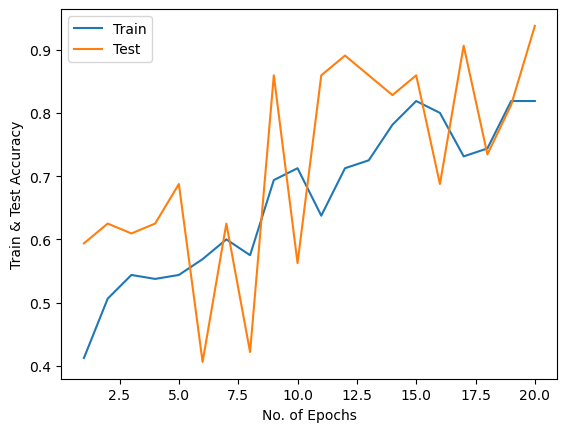

In [52]:
# list of epoch number 
x = list(range(1,epochs+1)) 
plt.xlabel("No. of Epochs")
plt.ylabel("Train & Test Accuracy")
plt.plot(x, acc)
plt.plot(x, val_acc)
plt.legend(["Train","Test"])
plt.show()

First image to predict
Actual label:  fall_armyworm
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
Predicted Lablel fall_armyworm with accuracy of:  81.87500238418579 %


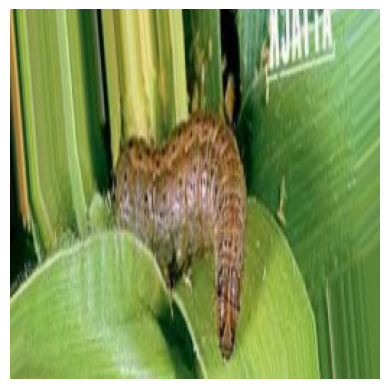

In [53]:
for image_batch, label_batch in test_ds.take(1):
    first_img = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_img)
    print("Actual label: ",class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Lablel", class_name[np.argmax(batch_prediction[0])],"with accuracy of: ",acc[-1]*100,"%")
    plt.axis("off")

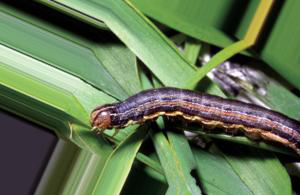

In [54]:
from PIL import Image
image_path=("C:\\Users\\Acer\\Downloads\\corn worm\\WormData_Classifier\\WormData\\fall_armyworm\\armyworm_0_1027.jpeg")
image=Image.open(image_path)
image

In [55]:
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array,0) # create a batch
    
predictions = model.predict(img_array)
print(predictions)
predicted_class = class_name[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])),2)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
[[0.03070118 0.96929884]]


In [56]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array,0) # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

In [57]:
print(predict(model,image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
('fall_armyworm', 96.93)


In [58]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [62]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("C:\\Users\\Acer\\my_model2.hdf5")

# Preprocess the input image
def preprocess_image(image):
    img = image.resize((224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Make predictions on the input image
def predict(image):
    processed_image = preprocess_image(image)
    predictions = model.predict(processed_image)
    class_index = np.argmax(predictions)
    class_label = ['corn_earworm', 'fall_armyworm'][class_index]
    confidence = predictions[0][class_index] * 100
    return class_label, confidence

# # Streamlit app
# def main():
#     st.title("Sweetcorn Worm Classification")
#     st.write("Upload an image of a sweetcorn worm to classify it.")

#     # Upload image
#     uploaded_file = st.file_uploader("Choose an image file", type=["jpg", "jpeg", "png"])

#     if uploaded_file is not None:
#         # Read the image file
#         image = Image.open(uploaded_file)

#         # Display the uploaded image
#         st.image(image, caption='Uploaded Image', use_column_width=True)

#         # Make predictions
#         class_label, confidence = predict(image)

#         # Display the predictions
#         st.write("Prediction:")
#         st.write(f"Class: {class_label}")
#         st.write(f"Confidence: {confidence:.2f}%")

# if __name__ == '__main__':
#     main()


In [60]:
import os

In [61]:
os.getcwd()

'C:\\Users\\Acer'

In [64]:
# import gradio as gr
# interface = gr.Interface(fn=predict,inputs='image',outputs=['text','text'])
